In [159]:
from matplotlib.pyplot import bar
import matplotlib.pyplot as plt
import numpy as np
import json

In [171]:
def round_gates(gates):
    gates[gates < 0.5] = 0
    gates[gates > 0.5] = 1
    return gates

In [19]:
def gen_token():
    with open("./res_lower.json") as f:
        text = [ json.loads(l) for l in f.readlines() ]
    for l in text:
        line = " ".join(l["text"])
        for t in l["tokens"]:
            yield t["token"], t["pos"], t["dep"], t["gates"], line

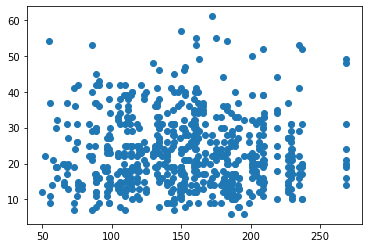

In [164]:
x, y = [], []
for token, pos, dep, gates, line in gen_token():
    if pos == "NOUN":
        x += [len(line)]
        y += [round(sum(gates))]

plt.scatter(x, y)

In [146]:
nouns = [ (token, pos, dep, gates, line) for token, pos, dep, gates, line in gen_token() if pos == "NOUN" ]

In [165]:
nouns = sorted(nouns, key=lambda x: len(x[4]))

In [170]:
nouns[2][3]

[0.0024080544244498014,
 0.0,
 0.0002908953174483031,
 0.0,
 0.0,
 0.0,
 1.0895428657531738,
 0.0,
 0.012712512165307999,
 0.0,
 0.3779940605163574,
 0.0,
 0.03100416250526905,
 0.008920961990952492,
 0.012039789929986,
 0.0,
 0.0,
 0.0,
 0.1213860809803009,
 0.0,
 0.0,
 0.0,
 0.7347539663314819,
 0.0333947129547596,
 0.0,
 0.14414510130882263,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4093608558177948,
 0.0,
 0.02616310492157936,
 0.13072894513607025,
 0.18076957762241364,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0006655115284956992,
 0.0,
 0.0,
 0.0,
 0.05339209362864494,
 2.269583225250244,
 0.07366658747196198,
 1.5790268182754517,
 0.02802087739109993,
 0.0,
 1.3881431818008423,
 0.0,
 0.11300686001777649,
 0.0,
 0.0,
 0.043937698006629944,
 0.0,
 0.6892770528793335,
 1.7106983661651611,
 0.0,
 0.0,
 0.9595401287078857,
 0.0,
 0.05001187324523926,
 0.0012181922793388367,
 0.41284796595573425,
 0.0,
 0.0,
 1.2265334129333496,
 0.0,
 0.0,
 2.1090216636657715,
 0.7379994988441467,
 0.0,
 0.0,
 0.9324289560

In [175]:
bold = lambda x: '\x1b[1;31m' + x + '\x1b[0m'
for token, pos, dep, gates, line in nouns:
    print (" ".join([bold(l) if l == token else l  for l in line.split(" ")]))
    print (dep, round(sum(gates)), sum(round_gates(np.array(gates).copy())), len(line))
    print ()

[CLS] that is one of the reasons i am here . [SEP]
pobj 12 9.0 50

[CLS] all four tasmanian boats have finished . [SEP]
nsubj 22 13.0 52

[CLS] i am for dialogue and i keep on saying this [SEP]
pobj 54 28.0 55

[CLS] india ruled out any face - to - face talks . [SEP]
nmod 9 9.0 56

[CLS] india ruled out any face - to - face talks . [SEP]
pobj 11 9.0 56

[CLS] india ruled out any face - to - face talks . [SEP]
dobj 37 22.0 56

[CLS] the were no reported injuries onboard . [UNK] [SEP]
attr 14 9.0 57

[CLS] nicky [UNK] might be out in time , " he said . [SEP]
pobj 21 13.0 58

[CLS] the others fell victim to the [UNK] conditions . [SEP]
nsubj 19 12.0 60

[CLS] the others fell victim to the [UNK] conditions . [SEP]
dobj 30 18.0 60

[CLS] the others fell victim to the [UNK] conditions . [SEP]
pobj 19 13.0 60

[CLS] i will be in shape by the end of the tournament . [SEP]
pobj 19 11.0 61

[CLS] i will be in shape by the end of the tournament . [SEP]
pobj 16 8.0 61

[CLS] i will be in shape by 

npadvmod 28 19.0 187

[CLS] work is continuing this morning to restore power supplies to tens of thousands of homes that were [UNK] out during wild storms that struck south - east queensland last night . [SEP]
compound 29 18.0 187

[CLS] work is continuing this morning to restore power supplies to tens of thousands of homes that were [UNK] out during wild storms that struck south - east queensland last night . [SEP]
dobj 16 12.0 187

[CLS] work is continuing this morning to restore power supplies to tens of thousands of homes that were [UNK] out during wild storms that struck south - east queensland last night . [SEP]
quantmod 13 8.0 187

[CLS] work is continuing this morning to restore power supplies to tens of thousands of homes that were [UNK] out during wild storms that struck south - east queensland last night . [SEP]
pobj 10 8.0 187

[CLS] work is continuing this morning to restore power supplies to tens of thousands of homes that were [UNK] out during wild storms that struck sou

In [194]:
def get_count():
    count_pos, count_dep, count_mixed = {}, {}, {}
    count_pos_layer, count_dep_layer, count_mixed_layer = {}, {}, {}
    for token, pos, dep, gates, line in gen_token():
        sum_gates = [sum(gates)]
        sum_gates_layer = [np.array(gates).reshape(12, 12).sum(axis=1)]

        if pos not in count_pos:
            count_pos[pos] = []
            count_pos_layer[pos] = []
        if dep not in count_dep:
            count_dep[dep] = []
            count_dep_layer[dep] = []
        if (pos, dep) not in count_mixed:
            count_mixed[(pos, dep)] = []
            count_mixed_layer[(pos, dep)] = []

        count_dep[dep] += sum_gates
        count_dep_layer[dep] += sum_gates_layer

        count_pos[pos] += sum_gates
        count_pos_layer[pos] += sum_gates_layer

        count_mixed[(pos, dep)] += sum_gates
        count_mixed_layer[(pos, dep)] += sum_gates_layer

    return (count_pos, count_dep, count_mixed,
            count_pos_layer, count_dep_layer, count_mixed_layer)

count_pos, count_dep, count_mixed, count_pos_layer, count_dep_layer, count_mixed_layer = get_count()

In [104]:
def explore_sub(fct, key):
    count = {}
    for token, pos, dep, gates, line in gen_token():
        if fct(pos, dep) == key:
            if fct(dep, pos) not in count:
                count[fct(dep, pos)] = []
            count[fct(dep, pos)] += [sum(gates)]
    return count

In [7]:
dep_ann = {
    "acl": "clausal modifier of noun (adjectival clause)",
"acomp":"adjectival complement",
"advcl":"adverbial clause modifier",
"advmod":"adverbial modifier",
"agent":"agent",
"amod":"adjectival modifier",
"appos":"appositional modifier",
"attr":"attribute",
"aux":"auxiliary",
"auxpass":"auxiliary (passive)",
"case":"case marking",
"cc":"coordinating conjunction",
"ccomp":"clausal complement",
"compound":"compound",
"conj":"conjunct",
"cop":"copula",
"csubj":"clausal subject",
"csubjpass":"clausal subject (passive)",
"dative":"dative",
"dep":"unclassified dependent",
"det":"determiner",
"dobj":"direct object",
"expl":"expletive",
"intj":"interjection",
"mark":"marker",
"meta":"meta modifier",
"neg":"negation modifier",
"nn":"noun compound modifier",
"nounmod":"modifier of nominal",
"npmod":"noun phrase as adverbial modifier",
"nsubj":"nominal subject",
"nsubjpass":"nominal subject (passive)",
"nummod":"numeric modifier",
"oprd":"object predicate",
"obj":"object",
"obl":"oblique nominal",
"parataxis":"parataxis",
"pcomp":"complement of preposition",
"pobj":"object of preposition",
"poss":"possession modifier",
"preconj":"pre-correlative conjunction",
"prep":"prepositional modifier",
"prt":"particle",
"punct":"punctuation",
"quantmod":"modifier of quantifier",
"relcl":"relative clause modifier",
"root":"root",
"xcomp":"open clausal complement",
}

# tableau: moyenne, écart standard

In [113]:
sort = lambda z : sorted(z, key=lambda x: -np.mean(z[x]))

print ("{:<10}{:<10}{:<10}{}".format("POS", "Freq", "Mean", "Std Dev\n"))
for k in sort(count_pos):
    if len(count_pos[k]) > 5:
        print ("{:<10}{:<10}{:<10}{}".format(k,
                                             len(count_pos[k]),
                                             round(np.mean(count_pos[k])),
                                             round(np.std(count_pos[k]))))

POS       Freq      Mean      Std Dev

PROPN     319       24.0      12.0
NOUN      624       23.0      10.0
ADJ       228       23.0      11.0
NUM       95        22.0      11.0
ADV       137       20.0      12.0
VERB      551       18.0      10.0
PRON      83        12.0      8.0
CCONJ     83        12.0      7.0
ADP       434       12.0      7.0
DET       372       9.0       6.0
PART      72        9.0       12.0
SYM       10        7.0       2.0
PUNCT     367       7.0       6.0


In [114]:
print ("{:<15}{:<10}{:<10}{}".format("POS", "Freq", "Mean", "Std Dev\n"))

for k in sort(count_mixed):
    if len(count_mixed[k]) > 5:
        print ("{:<15}{:<10}{:<10}{}".format("-".join(k),
                                             len(count_mixed[k]),
                                             round(np.mean(count_mixed[k])),
                                             round(np.std(count_mixed[k]))))

POS            Freq      Mean      Std Dev

NOUN-poss      6         36.0      3.0
PROPN-poss     12        32.0      12.0
PROPN-dobj     11        29.0      13.0
PART-prt       11        29.0      11.0
PROPN-pobj     90        27.0      11.0
PRON-dobj      6         26.0      10.0
ADJ-acomp      19        25.0      11.0
VERB-xcomp     42        25.0      10.0
NOUN-dobj      118       25.0      10.0
VERB-amod      12        24.0      9.0
NOUN-nsubj     91        24.0      10.0
ADJ-advmod     6         24.0      10.0
NOUN-pobj      235       24.0      10.0
NUM-nummod     66        23.0      12.0
VERB-pcomp     9         23.0      10.0
ADJ-amod       185       23.0      11.0
NOUN-compound  80        23.0      10.0
PROPN-compound 131       23.0      14.0
NOUN-npadvmod  26        23.0      9.0
PROPN-nsubj    36        23.0      10.0
NOUN-attr      11        23.0      11.0
VERB-conj      26        22.0      10.0
VERB-acl       25        22.0      10.0
PROPN-conj     19        22.0      7.0


In [126]:
print ("{:<15}{:<15}{:<10}{:<10}{}".format("POS", "DEP", "Freq", "Mean", "Std Dev\n"))

for k in sort(count_pos):
    if len(count_pos[k]) > 5:
        print ("\n{:<15}".format(k))
        count = explore_sub(lambda pos, dep: pos, k)
        for n in sort(count):
            if len(count[n]) > 5:
                print ("{:<15}{:<15}{:<10}{:<10}{}".format("",
                                                           n,
                                                           len(count[n]),
                                                           round(np.mean(count[n])),
                                                           round(np.std(count[n]))))

POS            DEP            Freq      Mean      Std Dev


PROPN          
               poss           12        32.0      12.0
               dobj           11        29.0      13.0
               pobj           90        27.0      11.0
               compound       131       23.0      14.0
               nsubj          36        23.0      10.0
               conj           19        22.0      7.0
               nmod           8         19.0      7.0

NOUN           
               poss           6         36.0      3.0
               dobj           118       25.0      10.0
               nsubj          91        24.0      10.0
               pobj           235       24.0      10.0
               compound       80        23.0      10.0
               npadvmod       26        23.0      9.0
               attr           11        23.0      11.0
               conj           20        20.0      5.0
               nsubjpass      21        18.0      8.0

ADJ            
               a

# Layer par layer

In [266]:
def sort_layer(n_layer):
    sort = lambda z : sorted(z, key=lambda x: -np.mean(np.array(z[x])[:,n_layer]))

    print ("{:<10}{:<10}{:<10}{}".format("POS", "Freq", "Mean", "Std Dev\n"))
    for k in sort(count_pos_layer):
        layer_gates = np.array(count_pos_layer[k])[:,n_layer]
        if len(layer_gates) > 5:
            print ("{:<10}{:<10}{:<10}{}".format(k,
                                             len(layer_gates),
                                             round(layer_gates.mean(), 4),
                                             round(np.std(layer_gates), 4)))

In [255]:
for i in range(12):
    print ("layer", i+1)
    sort_layer(i)
    print ()

layer 1
POS       Freq      Mean      Std Dev

NUM       95        1.0939    1.2066
PROPN     319       1.0531    1.1264
ADJ       228       0.9948    1.1115
NOUN      624       0.9936    1.1118
VERB      551       0.6935    0.8683
ADV       137       0.6864    0.8972
ADP       434       0.4862    0.7598
PRON      83        0.483     0.6221
CCONJ     83        0.4492    0.6167
PUNCT     367       0.3642    0.4734
PART      72        0.3277    0.5881
DET       372       0.2861    0.4898
SYM       10        0.2355    0.3662

layer 2
POS       Freq      Mean      Std Dev

PROPN     319       2.0715    1.4209
ADJ       228       1.8211    1.3168
NOUN      624       1.7088    1.221
NUM       95        1.6755    1.3573
VERB      551       1.3335    1.0039
ADV       137       1.1877    1.0364
PUNCT     367       1.0103    0.9263
ADP       434       0.9432    0.7828
PART      72        0.8983    0.7409
PRON      83        0.8958    0.6335
DET       372       0.8539    0.6792
CCONJ     83      

In [280]:
norm = lambda x: x / np.sum(x)
slice_mean = lambda x, n: x.reshape(int(12/n), n).mean(axis=1)
layer_mean = lambda x: np.array(x).mean(axis=0)


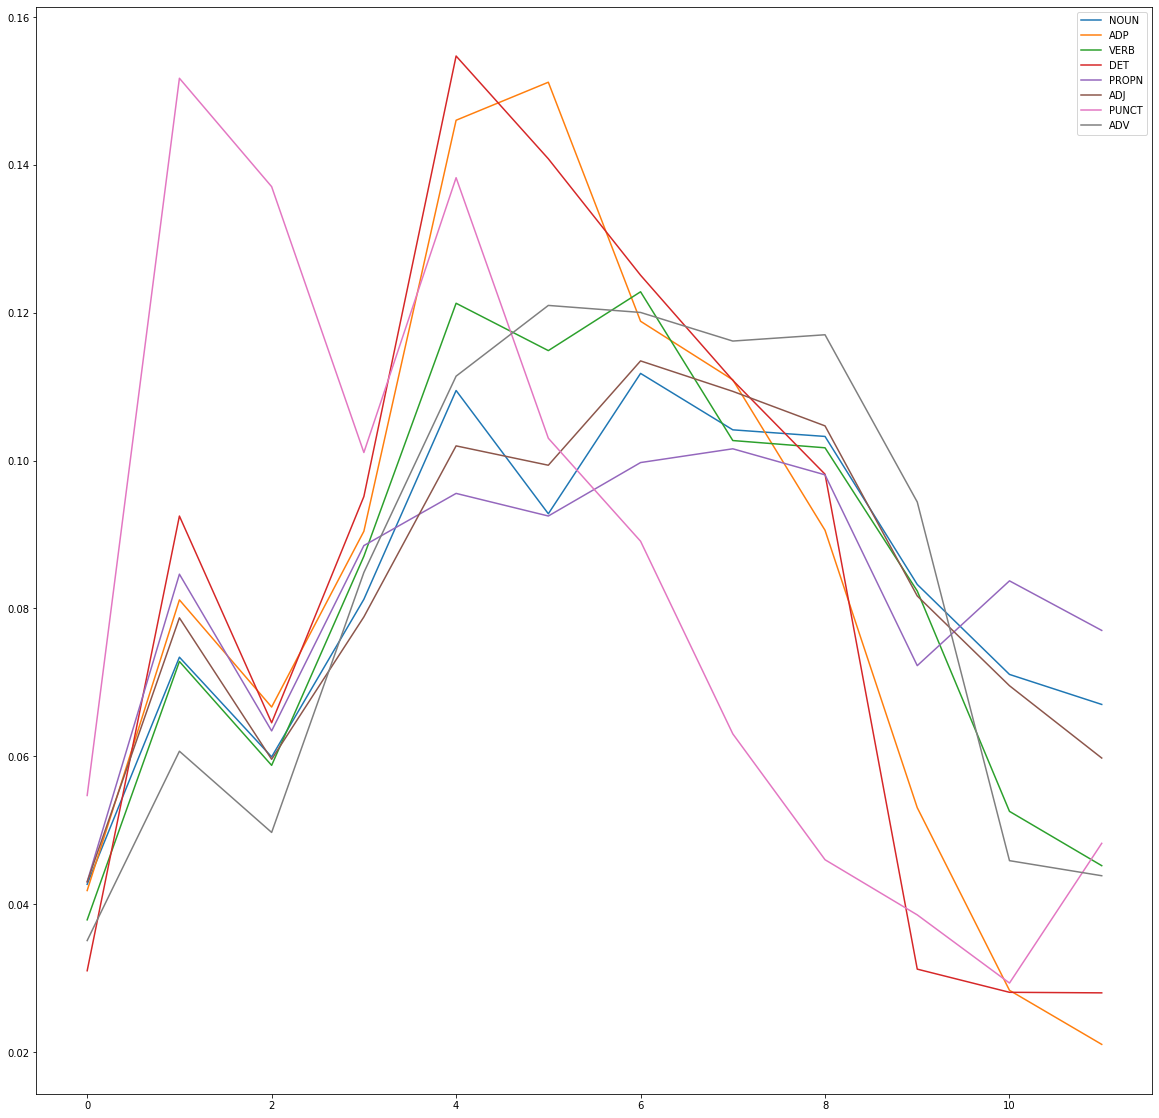

In [278]:
plt.figure(figsize=(20,20))
for k in count_pos_layer:
    if len(count_pos_layer[k]) > 100:
        plt.plot(norm(layer_mean(count_pos_layer[k])), label=k)
plt.legend()

In [311]:

coeff = [ (k, np.corrcoef(np.arange(12), layer_mean(count_pos_layer[k]))[0][1]) for k in count_pos_layer ]

coeff = sorted(coeff, key=lambda x: -x[1])
for k, val in coeff:
    if len(count_pos_layer[k]) > 100:
        print ("{:<10}{}".format(k, val))

PROPN     0.3665183668299445
NOUN      0.30524914642641565
ADJ       0.23507703853771145
ADV       0.16619585497253872
VERB      0.03731856888785097
DET       -0.2681378870497394
ADP       -0.27357806143658114
PUNCT     -0.7011768490899075


In [292]:
import scipy.stats

scipy.stats.linregress(), np.arange(12))


LinregressResult(slope=2.1880827081932623, intercept=1.2548702005271615, rvalue=0.3052491464264156, pvalue=0.3346416404866648, stderr=2.158591831578421)

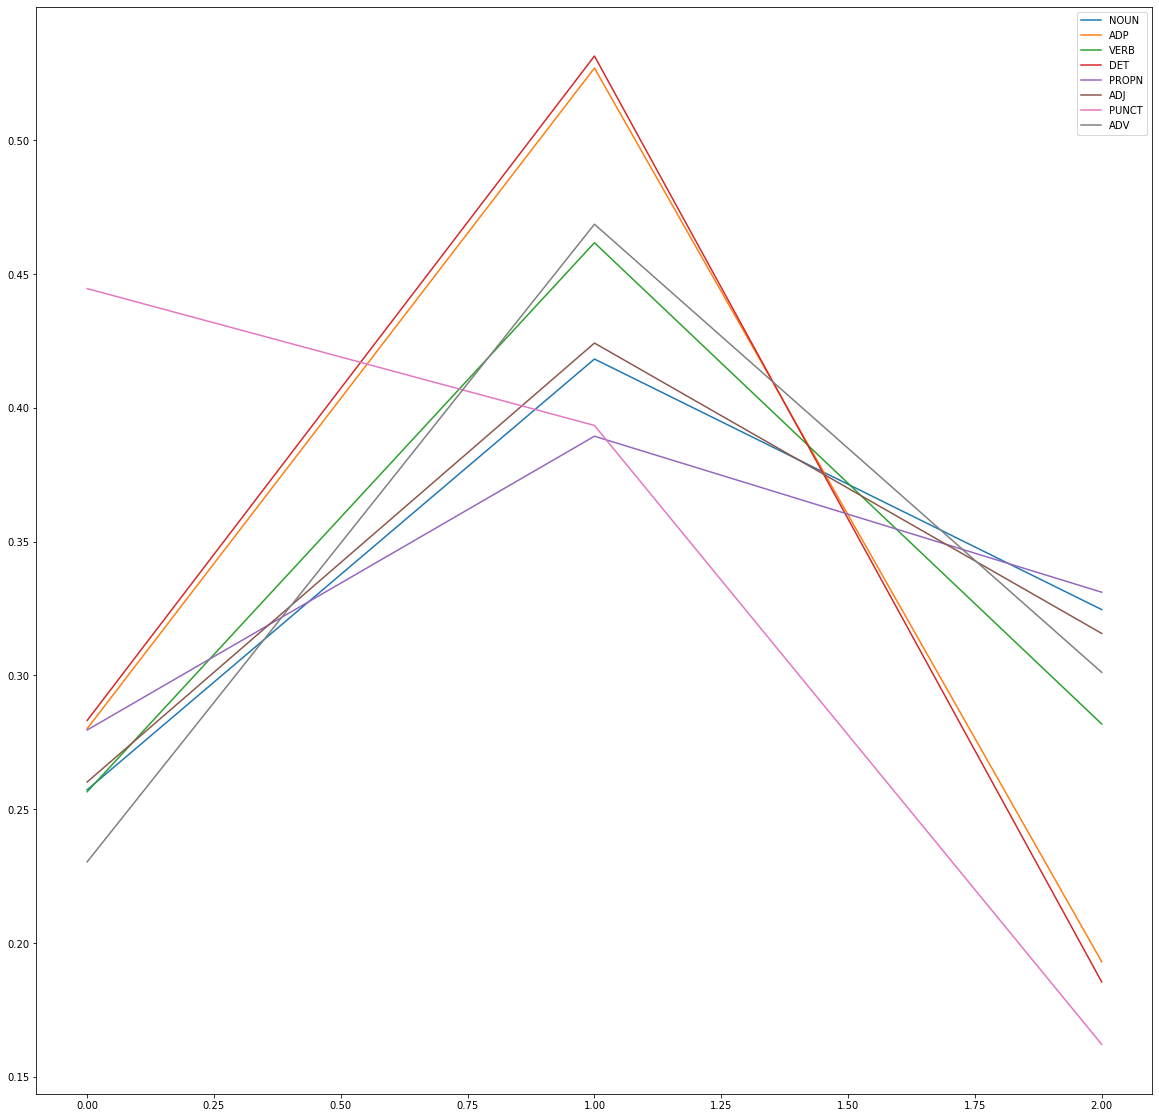

In [286]:
plt.figure(figsize=(20,20))
for k in count_pos_layer:
    if len(count_pos_layer[k]) > 100:
        plt.plot(norm(slice_mean(layer_mean(count_pos_layer[k]), 4)), label=k)
plt.legend()

In [ ]:
corrcoef